fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0


C:\Users\burt\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


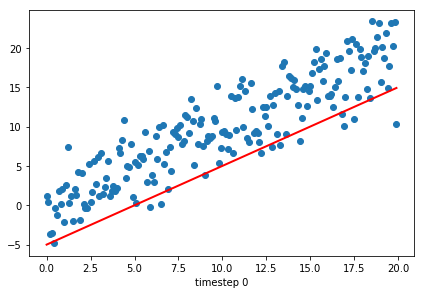

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

#  询问图形在屏幕上的尺寸和DPI（每英寸点数）。
#  注意当我们把图形储存成一个文件时，我们需要再另外提供一个DPI值
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# 画出一个维持不变（不会被重画）的散点图和一开始的那条直线。
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # 更新直线和x轴（用一个新的x轴的标签）。
    # 用元组（Tuple）的形式返回在这一帧要被重新绘图的物体
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation 会在每一帧都调用“update” 函数。
    # 在这里设置一个10帧的动画，每帧之间间隔200毫秒
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() 会一直循环播放动画
        plt.show()